## Final Project - Econometric estimation of an IRL-based market portfolio model


**Abstract:**

Reinformente Learning $ \bf{(RL)} $ is one of the most fascinating fields since it fuses areas of great interest to researchers such as statistics, optimization and other mathematical subjects. Reinforcement learning problems involve learning what to do | how to map situations to actions | so as to maximize a numerical reward signal. In an essential way they are closed-loop problems because the learning system's actions inuence its later inputs. Moreover, the learner is not told which actions to take, as in many forms of machine learning, but instead must discover which actions yield the most rewarding by trying them out. In the most interesting and challenging cases, actions may act not only the immediate reward but also the next situation and, through that, all subsequent rewards [6].

In this project we will analyze the configuration of the model of an $ \bf{IRL} $ market portfolio where the actions of an agent are not directly observable only their impact on market prices is observed. unobserved actions can be seen as hidden variables that now become part of the model's inference. Another interesting aspect that we will see is the horizon planning, since for the IRL market portfolio model we do not have a well defined notion of the initial time $ \bf{t}_0$ and final time $ \bf{T} $. The only known and well-defined time-like parameter is the current $ \bf{t} $.


**Main Aims & Objectives of the Final Project :** 

- To explore and estimate an IRL-based model of market returns (Based on IRL of a market-optimal portfolio) 
- To investigate the role and impact of choices of different signals on model estimation and trading strategies


**Project structure and grading principles :**

- **Part 1**:To Build model estimation for the DJI portfolio of 30 stocks with simple signals such as simple moving averages (SMA).

- **Part 2**: To investigate the dynamics for market caps (DJI) obtained with alternative signals such as **(High/Low Bollinger Bands)**, based on the results it will show the conclusions and observations. 

- **Part 3**: To Build model estimation with simple signal such as SMA and investigate the dynamics for market caps (SP500) obtained with alternative, based on the results it will show the conclusions and observations. 




**Articles/Papers used as reference to reach out the goals**

**[1]** Harry Markowitz, "Portfolio Selection" ,The Journal of Finance, Vol. 7, No. 1. (Mar., 1952), pp. 77-91.

**[2]** F. Black and R. Litterman, "Global Portfolio Optimization", Financial Analyst Journal, Sept-Oct. 1992, 28-43

**[3]** Eugene F. Fama, Kenneth R. French, "Multifactor Explanations of Asset Pricing Anomalies", The Journal of Finance, Vol. 51, No. 1. (Mar., 1996), pp. 55-84.

**[4]** D. Bertsimas, V. Gupta, and I.Ch. Paschalidis, "Inverse Optimization: A New Perspective on the Black-Litterman Model", Operations Research, Vol.60, No.6, pp. 1389-1403 (2012).

**[5]** I.Halperin and I. Feldshteyn "Market Self-Learning of Signals, Impact and Optimal Trading: Invisible Hand Inference with Free Energy", htps://www.researchgate.net/publication/325191623_Market_Self-Learning_of_Signals_Impact_and_Optimal_Trading_Invisible_Hand_Inference_with_Free_Energy). 

**[6]** Richard S. Sutton and Andrew G. Barto,"Reinforcement Learning:An Introduction". First Edition, 2015


## The IRL-based model of stock returns

In Week 4 lectures of our course we found that optimal investment policy in the problem of inverse portfolio optimization is a Gaussian policy

$$ \pi_{\theta}({\bf a}_t |{\bf y}_t ) =   \mathcal{N}\left({\bf a}_t | \bf{A}_0 + \bf{A}_1 {\bf y}_t, \Sigma_p \right) $$

Here $ {\bf y}_t $ is a vector of dollar position in the portfolio, and $ \bf{A}_0 $, $ \bf{A}_1 $ and $ \Sigma_p $ are parameters defining a Gaussian policy.   

We said in the lecture that such Gaussian policy is found for both cases of a single investor and a market portfolio. We also sketched a numerical scheme that can iteratively compute coefficients $ \bf{A}_0$, $ \bf{A}_1 $ and $ \Sigma_p $ using a combination of a RL algorithm called G-learning and a trajectory optimization algorithm.

In this project, you will explore implications and estimation of this IRL-based model for the most interesting case - the market portfolio. It turns out that for this case, the model can be estimated in an easier way using a conventional Maximum Likelihood approach. To this end, we will re-formulate the model for this particular case in three easy steps.


Recall that for a vector of $ N $ stocks, we introduced a size $ 2 N $-action vector 
$ {\bf a}_t = [{\bf u}_t^{(+)}, {\bf u}_t^{(-)}] $, so that an action $ {\bf u}_t $ was defined as a difference of two non-negative numbers 
$ {\bf u}_t = {\bf u}_t^{(+)} -  {\bf u}_t^{(-)} = [{\bf 1}, - {\bf 1}] {\bf a}_t \equiv {\bf 1}_{-1}^{T} {\bf a}_t $.

Therefore, the joint distribution of $ {\bf a}_t = [{\bf u}_t^{(+)}, {\bf u}_t^{(-)} ] $ is given by our Gaussian policy
$  \pi_{\theta}({\bf a}_t |{\bf y}_t ) $. This means that the distribution of 
$ {\bf u}_t = {\bf u}_t^{(+)} -  {\bf u}_t^{(-)} $ is also Gaussian. Let us write it therefore as follows:

$$
\pi_{\theta}({\bf u}_t |{\bf y}_t ) =   \mathcal{N}\left({\bf u}_t | \bf{U}_0 + \bf{U}_1 {\bf y}_t, \Sigma_u \right) 
$$

Here $ \bf{U}_0 = {\bf 1}_{-1}^{T}  \bf{A}_0 $ and $ \bf{U}_1 =  {\bf 1}_{-1}^{T}  \bf{A}_1 $.

This means that $ {\bf u}_t $ is a Gaussian random variable that we can write as follows:

$$
{\bf u}_t = \bf{U}_0 + \bf{U}_1 {\bf y}_t + \varepsilon_t^{(u)}  = \bf{U}_0 + \bf{U}_1^{(x)} {\bf x}_t + \bf{U}_1^{(z)} {\bf z}_t + \varepsilon_t^{(u)} 
$$

where $ \varepsilon_t^{(u)} \sim \mathcal{N}(0,\Sigma_u) $ is a Gaussian random noise.  

The most important feature of this expression that we need going forward is is linear dependence on the state $ {\bf x}_t $. 
This is the only result that we will use in order to construct a simple dynamic market model resulting from our IRL model. We use a deterministic limit of this equation, where in addition we set $ \bf{U}_0 = \bf{U}_1^{(z)} = 0 $, and replace $ \bf{U}_1^{(x)} \rightarrow \phi $ to simplify the notation. We thus obtain a simple deterministic policy

$$
\label{determ_u}
{\bf u}_t =  \phi  {\bf x}_t 
$$

Next, let us recall the state equation and return equation (where we reinstate a time step $ \Delta t $,
and $ \circ $ stands for an element-wise (Hadamard) product):

$$
X_{t+ \Delta t} = (1 + r_t \Delta t) \circ (  X_t +  u_t  \Delta t)  
$$
$$
r_t   = r_f + {\bf w} {\bf z}_t -  \mu  u_t + \frac{\sigma}{ \sqrt{ \Delta t}} \varepsilon_t 
$$
where $ r_f $ is a risk-free rate, $ \Delta t $ is a time step, $ {\bf z}_t $ is a vector of predictors with weights $ {\bf w} $, $ \mu $ is a market impact parameter with a linear impact specification, and $ \varepsilon_t \sim \mathcal{N} (\cdot| 0, 1) $ is a white noise residual.


Eliminating $ u_t $ from these expressions and simplifying, we obtain
$$ \Delta  X_t = \mu  \phi  ( 1 + \phi \Delta t) \circ  X_t \circ \left(  \frac{r_f (1 + \phi \Delta t)  + \phi}{ \mu \phi (1+ \phi \Delta t )}  -  X_t \right) \Delta t + 
( 1 + \phi \Delta t) X_t  \circ \left[ {\bf w} {\bf z}_t  \Delta t +  \sigma \sqrt{ \Delta t} \varepsilon_t \right]
$$
Finally, assuming that $ \phi \Delta t \ll 1 $ and taking the continuous-time limit $  \Delta t \rightarrow dt $, we obtain 

$$
d X_t = \kappa \circ X_t \circ \left( \frac{\theta}{\kappa} - X_t \right) dt +  X_t \circ \left[ {\bf w} {\bf z}_t \, dt + \sigma d W_t \right]
$$
where $\kappa   =   \mu  \phi $, $ \theta  =   r_f + \phi $, and $ W_t $ is a standard Brownian motion.

Please note that this equation describes dynamics with a quadratic mean reversion. It is quite different from models with linear mean reversion such as the Ornstein-Uhlenbeck (OU) process. 

Without signals $ {\bf z}_t $, this process is known in the literature as a Geometric Mean Reversion (GMR) process. It has been used (for a one-dimensional setting) by Dixit and Pyndick (" Investment Under Uncertainty", Princeton 1994), and investigated (also for 1D) by Ewald and Yang ("Geometric Mean Reversion: Formulas for the Equilibrium Density and Analytic Moment Matching", {\it University of 
St. Andrews Economics Preprints}, 2007). We have found that such dynamics (in a multi-variate setting) can also be obtained for market caps (or equivalently for stock prices, so long as the number of shares is held fixed) using Inverse Reinforcement Learning! 

(For more details, see I. Halperin and I. Feldshteyn, "Market Self-Learning of Signals, Impact and Optimal Trading: Invisible Hand Inference with Free Energy.
(or, How We Learned to Stop Worrying and Love Bounded Rationality)", https://papers.ssrn.com/sol3/papers.cfm?abstract\_id=3174498) 


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from backtesting.test import SMA
from backtesting.lib import crossover
from matplotlib.dates import DateFormatter
import scipy.optimize as opt
import os

import matplotlib.pyplot as plt
from datetime import datetime
from backtesting import Strategy, Backtest

In [5]:
# read the data to a Dataframe
df_cap = pd.read_csv(os.getcwd() + '/data/dja_cap.csv')

In [6]:
# add dates
dates = pd.bdate_range(start='2010-01-04', end=None, periods=df_cap.shape[0], freq='B')
df_cap['date'] = dates
df_cap['DJI'] = df_cap.sum(axis=1)

stock_id=df_cap.iloc[0,:].index

df_cap.set_index('date',inplace=True)
df_cap.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM,DJI
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.937537e+11,48660795480,4.082033e+10,36460724400,1.420313e+11,1.586155e+11,6.168697e+10,3.337392e+10,1.645038e+11,8.897731e+10,...,1.527563e+11,178576382080,27214839130,36638396010,67155918570,41337043020,94536765440,206625627560,3.272107e+11,3.465480e+12
2010-01-05,1.940887e+11,48553770270,4.215727e+10,36896634000,1.413985e+11,1.597391e+11,6.153308e+10,3.486077e+10,1.653556e+11,9.055040e+10,...,1.505775e+11,178634816760,26570118990,36580295160,66152751840,40863360090,94707204320,204568134680,3.284884e+11,3.464521e+12
2010-01-06,1.910015e+11,49338621810,4.343609e+10,37008725040,1.404781e+11,1.597591e+11,6.120609e+10,3.547838e+10,1.645038e+11,8.958393e+10,...,1.500934e+11,177787513900,26193121620,36940520430,65805862410,40314638280,90673484160,204110914040,3.313275e+11,3.457581e+12
2010-01-07,1.906484e+11,49921314620,4.519446e+10,37158179760,1.411109e+11,1.591572e+11,6.122532e+10,3.550126e+10,1.730218e+11,9.133695e+10,...,1.495285e+11,176823341680,26570118990,38358181170,66087124110,40689832680,90133761040,204225219200,3.302865e+11,3.468896e+12
2010-01-08,1.919159e+11,49885639550,4.475850e+10,37575407520,1.418587e+11,1.594381e+11,6.132150e+10,3.562706e+10,1.767484e+11,8.960963e+10,...,1.507389e+11,176589602960,26531872880,37997955900,66218379570,40802391000,90190574000,203196472760,3.289615e+11,3.474456e+12


## Let us build some signals 

Here we provide a "warm start" by computing two simple moving average signals that you can use as benchmark in your analysis.

### Generate moving averages

In this section I am going to use one of the most used indicators or Trading signals (SMA) as part of the strategy of any investment manager. Along with correct risk management tools, they can help us gain a better insight into price trends. I will explore the use of the SMA from the construction of the signals (SMA 12-SMA 26) to make a small comparison between them relative to the percentage of return.

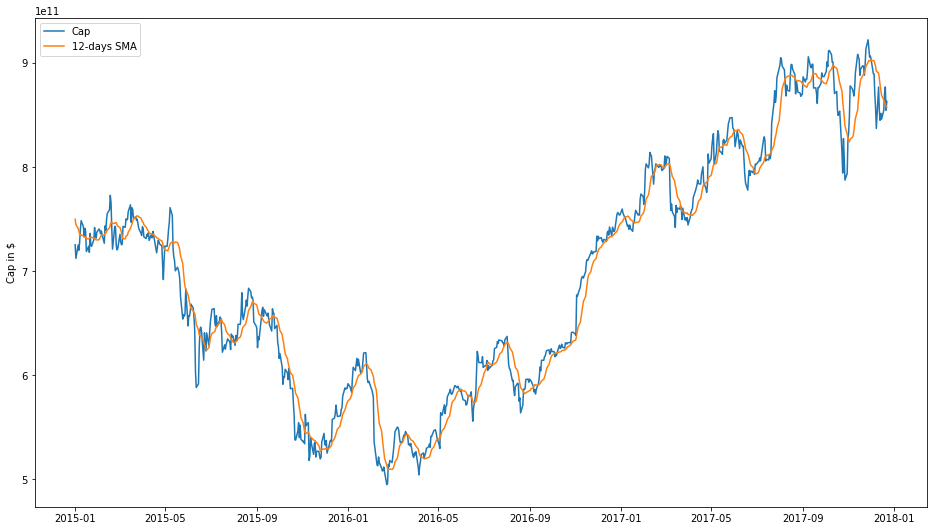

In [7]:
# Calculating the short-window (12 days) simple moving average
start_date = '2015-01-01'
end_date = '2017-12-31'


window_1 = 12
short_rolling = df_cap.rolling(window=window_1).mean()
short_rolling_apple=pd.DataFrame(short_rolling.loc[start_date:end_date, 'AAPL'])
ticker = 'AAPL'

apple= pd.DataFrame(df_cap.loc[start_date:end_date, 'AAPL'])
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'AAPL'], 
         label = '%d-days SMA' % window_1)

ax.legend(loc='best')
ax.set_ylabel('Cap in $')

plt.show()



**Assumptions SMA 12**
Once the construction of the SMA-12 signal is completed, we proceed to evaluate the commercial strategy such as giving a value to each movement of the signal -1/3 for sale or 1/3 for buy.

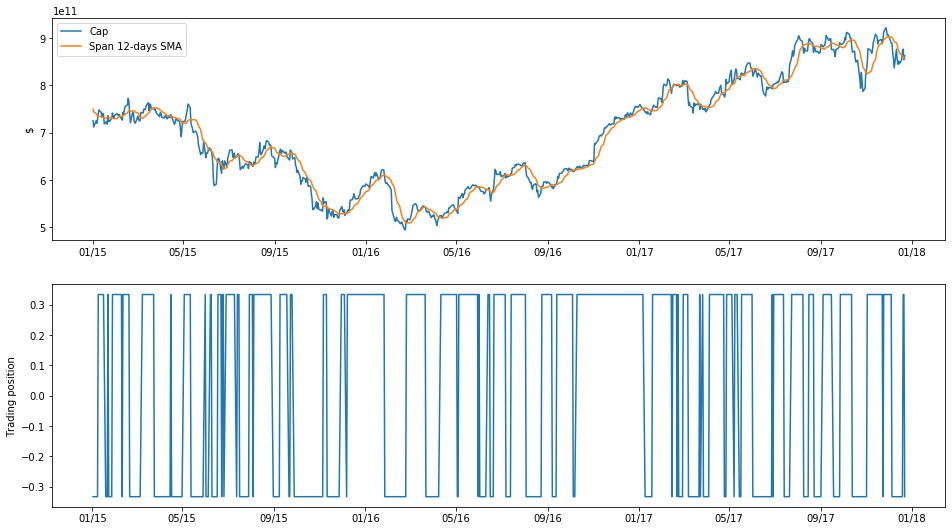

In [8]:

# Trading Position & Time Series simulation
trading_positions_raw_apple = apple - short_rolling_apple
trading_positions_raw_apple.tail()
trading_positions_apple = trading_positions_raw_apple.apply(np.sign) * 1/3
trading_positions_final_apple = trading_positions_apple.shift(1)
trading_positions_final_apple.tail()

import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
fig, (yx1, yx2) = plt.subplots(2, 1, figsize=(16,9))



yx1.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
yx1.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'AAPL'], label = 'Span 12-days SMA')

yx1.set_ylabel('$')
yx1.legend(loc='best')
yx1.xaxis.set_major_formatter(my_year_month_fmt)

yx2.plot(trading_positions_final_apple.loc[start_date:end_date, :].index, trading_positions_final_apple.loc[start_date:end_date, 'AAPL'], 
        label='Trading position')

yx2.set_ylabel('Trading position')
yx2.xaxis.set_major_formatter(my_year_month_fmt)

**SMA 12 Results using AAPL asset to evaluate the signal**

This section show you the cumulative logreturn and the avg. % Return based on strategy SMA 12

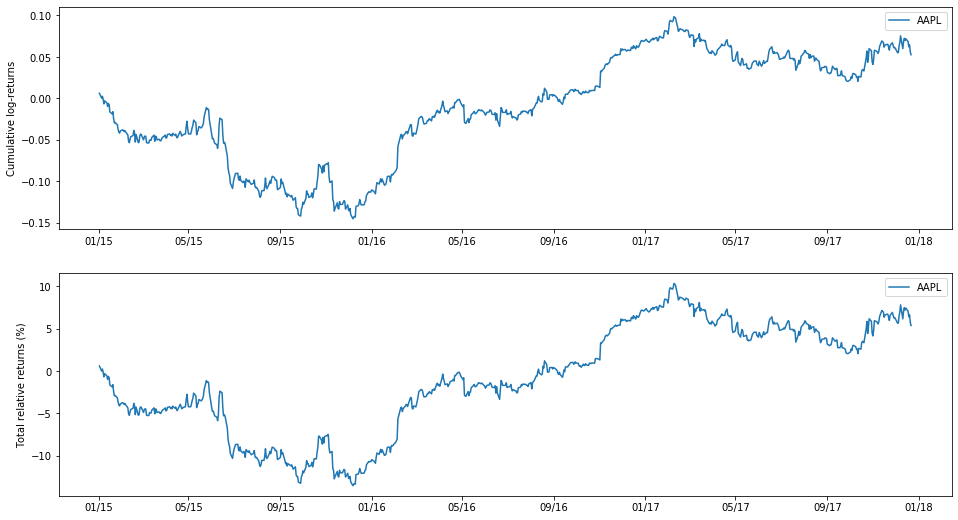

In [9]:
asset_log_returns_apple = np.log(apple).diff()
asset_log_returns_apple .head()
strategy_asset_log_returns_apple = trading_positions_final_apple * asset_log_returns_apple
strategy_asset_log_returns_apple.tail()


# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns_apple = strategy_asset_log_returns_apple.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns_apple = np.exp(cum_strategy_asset_log_returns_apple) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns_apple:
    ax1.plot(cum_strategy_asset_log_returns_apple.index, cum_strategy_asset_log_returns_apple[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)


for c in asset_log_returns_apple:
    ax2.plot(cum_strategy_asset_relative_returns_apple.index, 100*cum_strategy_asset_relative_returns_apple[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [10]:
#The overall, yearly, performance of our strategy can be calculated again as:
cum_strategy_asset_relative_returns_apple = np.exp(cum_strategy_asset_relative_returns_apple) - 1
cum_relative_return_exact_apple = cum_strategy_asset_relative_returns_apple.sum(axis=1)

def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact_apple)

Total portfolio return is:  5.54%
Average yearly return is:  1.82%


**Calculating the long-window (26 days) simple moving average SMA 26 signal**

<function matplotlib.pyplot.show(*args, **kw)>

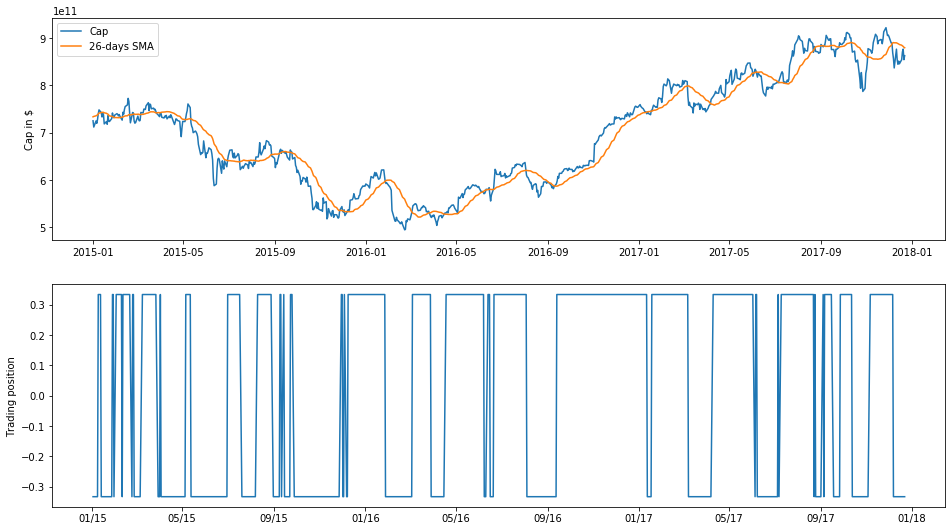

In [11]:
# Calculating the long-window (26 days) simple moving average

window_2 = 26
apple= pd.DataFrame(df_cap.loc[start_date:end_date, 'AAPL'])
long_rolling = df_cap.rolling(window=window_2).mean()
long_rolling_apple=pd.DataFrame(long_rolling.loc[start_date:end_date, 'AAPL'])

ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2017-12-31'

trading_positions_raw_apple_long = apple - long_rolling_apple
#trading_positions_raw_apple_long.tail()
trading_positions_apple_long = trading_positions_raw_apple_long.apply(np.sign) * 1/3
trading_positions_final_apple_long = trading_positions_apple_long.shift(1)
#trading_positions_long.tail()

my_year_month_fmt = mdates.DateFormatter('%m/%y')
fig, (ax1, yx3) = plt.subplots(2, 1, figsize=(16,9))


#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(1,1,1)
#yx3 = fig.add_subplot(1,1,1)

apple= df_cap.loc[start_date:end_date, 'AAPL']
ax1.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
ax1.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'AAPL'], 
          label = '%d-days SMA' % window_2)

yx3.plot(trading_positions_final_apple_long.loc[start_date:end_date, :].index, trading_positions_final_apple_long.loc[start_date:end_date, 'AAPL'], 
        label='Trading position')


yx3.xaxis.set_major_formatter(my_year_month_fmt)

ax1.legend(loc='best')
ax1.set_ylabel('Cap in $')
yx3.set_ylabel('Trading position')
# long_rolling.tail()
plt.show

**SMA 26 Results using AAPL asset to evaluate the signal**

This section show you the cumulative logreturn and the avg. % Return based on strategy SMA 12

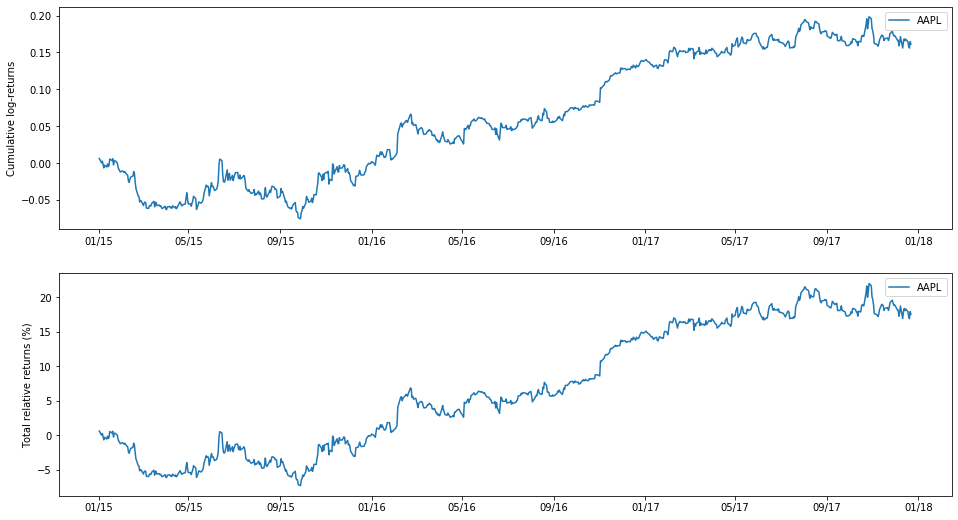

In [12]:
apple= pd.DataFrame(df_cap.loc[start_date:end_date, 'AAPL'])
asset_log_returns_apple = np.log(apple).diff()
asset_log_returns_apple_long = np.log(apple).diff()
asset_log_returns_apple_long.head()
strategy_asset_log_returns_apple_long = trading_positions_final_apple_long * asset_log_returns_apple
strategy_asset_log_returns_apple_long.tail()


# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns_apple_long = strategy_asset_log_returns_apple_long.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns_apple_long = np.exp(cum_strategy_asset_log_returns_apple_long) - 1

fig, (ax5, ax6) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns_apple_long:
    ax5.plot(cum_strategy_asset_log_returns_apple_long.index, cum_strategy_asset_log_returns_apple_long[c], label=str(c))

ax5.set_ylabel('Cumulative log-returns')
ax5.legend(loc='best')
ax5.xaxis.set_major_formatter(my_year_month_fmt)


for c in asset_log_returns_apple_long:
    ax6.plot(cum_strategy_asset_relative_returns_apple_long.index, 100*cum_strategy_asset_relative_returns_apple_long[c], label=str(c))

ax6.set_ylabel('Total relative returns (%)')
ax6.legend(loc='best')
ax6.xaxis.set_major_formatter(my_year_month_fmt)

In [13]:
#The overall, yearly, performance of our strategy can be calculated again as:
cum_strategy_asset_relative_returns_apple_long = np.exp(cum_strategy_asset_relative_returns_apple_long) - 1
cum_relative_return_exact_apple_long = cum_strategy_asset_relative_returns_apple_long.sum(axis=1)

def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns_apple_long, days_per_year = 52 * 5):

    total_days_in_simulation_long = portfolio_cumulative_relative_returns_apple_long.shape[0]
    number_of_years = total_days_in_simulation_long / days_per_year

    # The last data point will give us the total portfolio return
    
    total_portfolio_return_apple_long = portfolio_cumulative_relative_returns_apple_long[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return_apple_long = (1 + total_portfolio_return_apple_long)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return_apple_long) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return_apple_long) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact_apple_long)

Total portfolio return is: 19.12%
Average yearly return is:  6.03%


### Plot three years of AAPL stock using 2 signals:
This is a little comparision between both SMA 26 / SMA 12 signals

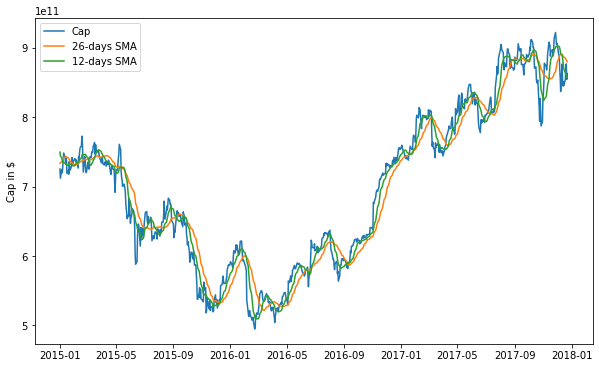

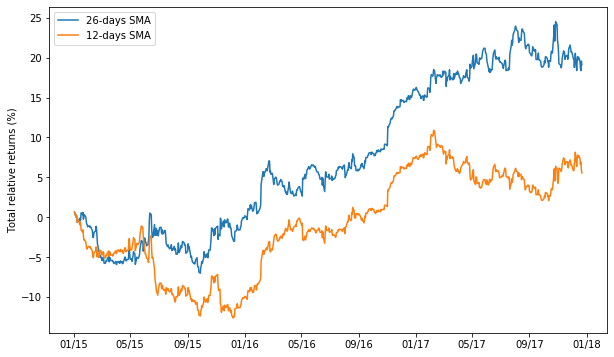

In [14]:
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(10,6))
fig2 = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax2 = fig2.add_subplot(1,1,1)
#fig, (ax5,ax6) = plt.subplots(2, 1, figsize=(16,9))

ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'AAPL'], 
          label = '%d-days SMA' % window_2)
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'AAPL'], 
         label = '%d-days SMA' % window_1)

for c in asset_log_returns_apple_long:
    ax2.plot(cum_strategy_asset_relative_returns_apple_long.index, 100*cum_strategy_asset_relative_returns_apple_long[c], label = '%d-days SMA' % window_2)
    ax2.plot(cum_strategy_asset_relative_returns_apple.index, 100*cum_strategy_asset_relative_returns_apple[c], label = '%d-days SMA' % window_1)




ax.legend(loc='best')
ax.set_ylabel('Cap in $')
ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)
#plt.show()


## Part 1: Model calibration with moving average signals (Max 10 points)

Recall the equation for the dynamics of market portfolio: 

$$ \Delta {\bf x}_t = \kappa_x \circ  {\bf x}_t \circ 
\left( {\bf W}{\bf z}_t'  - {\bf x}_t \right)  +  {\bf x}_t  \circ \varepsilon_t^{(x)} $$

Here we change the notation a bit. Now $ {\bf z}_t' $ is an extended vector of predictors that includes a constant unit predictor $  {\bf z}_t' = [1, {\bf z}_t ]^T $. Therefore, for each name, if you have $ K = 2 $ signals, an extended vector of signals $ {\bf z}_t' $ is of length $ K + 1 $, and the  $ W $ stands for a factor loading matrix.
The negative log-likelihood function for observable data with this model is therefore

$$  LL_M (\Theta) = - \log \prod_{t=0}^{T-1} 
\frac{1}{ \sqrt{ (2 \pi)^{N}  \left| \Sigma_x \right| }} 
e^{ - \frac{1}{2} \left(   {\bf v}_t
 \right)^{T} 
\Sigma_x^{-1}  
\left(  {\bf v}_t \right)} $$

where

$$  {\bf v}_t \equiv \frac{{\bf x}_{t+1} -  {\bf x}_{t}}{{\bf x}_{t}}  
-  \kappa_x \circ \left({\bf W} {\bf z}_t'   - {\bf x}_t \right)  $$

and $ \Sigma_x $ is the covariance matrix that was specified above in terms of other parameters. Here we directly infer the value of $ \Sigma_x $, along with other parameters, from data, so we will not use these previous expressions. 

Parameters that you have to estimate from data are therefore the vector of mean reversion speed 
parameters $ \kappa_x $, factor loading matrix $ {\bf W} \equiv {\bf w}_z' $, and covariance matrix $ \Sigma_x $. 

Now, you are free to impose some structure on this parameters. Here are some choice, in the order of increasing complexity:

- assume that all values in vector-valued and matrix-valued parameters are the same, so that they can parametrized by scalars, e.g. $ \kappa_x = \kappa {\bf 1}_N $ where $ \kappa $ is a scalar value, and $ {\bf 1}_N $ is a vector of ones of length $ N $ where $ N $ is the number of stocks in the market portfolio. You can proceed similarly with specification of factor loading matrix $ W' $. Assume that all values in (diagonal!) factor loading matrices are the same for all names, and assume that all correlations and variances in the covariance matrix $ \Sigma_x $ are the same for all names.   

- Assume that all values are the same only within a given industrial sector.


- You can also change the units. For example, you can consider logs of market caps instead of market caps themselves, ie. change the variable from $ {\bf x}_t  $ to $ {\bf q}_t = \log {\bf x}_t $ therefore


## Part 1.1: Set up a maximization (minimization) Model  and calibration with SMA

In this part of project, these are my Assumptions & Notations:

- I going to explore the dynamics market from 

$$ \Delta {\bf x}_t = \kappa_x \circ  {\bf x}_t \circ 
\left( {\bf W}{\bf z}_t'  - {\bf x}_t \right)  +  {\bf x}_t  \circ \varepsilon_t^{(x)} $$.

where (Notations)

$ \Delta{\bf x}_t $ Represent the variation of the observed stock market prices.

$ \kappa_x  $  Represent the vector of mean reversion speed parameters.

$ {\bf x}_t $ Represent the values of the observed stock market prices.

$ {\bf W} $ Represent the matrix of factor loading.

$ {\bf z}_t $ Represent the vector of predictors (external signals).

$ \varepsilon_t^{(x)} $ Represent the vector of residuals or residual error.


- I going to estmimate the model from Maximum Likelihood method using the next function 


$$  LL_M (\Theta) = - \log \prod_{t=0}^{T-1} 
\frac{1}{ \sqrt{ (2 \pi)^{N}  \left| \Sigma_x \right| }} 
e^{ - \frac{1}{2} \left(   {\bf v}_t
 \right)^{T} 
\Sigma_x^{-1}  
\left(  {\bf v}_t \right)},  {\bf v}_t \equiv \frac{{\bf x}_{t+1} -  {\bf x}_{t}}{{\bf x}_{t}}  
-  \kappa_x \circ \left({\bf W} {\bf z}_t'   - {\bf x}_t \right)  $$



where (Notations)

$ {T} $ Represent the planning horizon (time).

$ {t} $ Represent the beginning of interval(time)-

$ {N} $ Represent the number of stocks in the market portfolio.

$ {\left| \Sigma_x \right| } $ is the covariance matrix.

$ {\bf v_t } $ Represent the total value of portfolio.


- I have changed the units. i have used the logs of market caps instead of market caps themselves, changing the variable from $ {\bf x}_t  $ to $ {\bf q}_t = \log {\bf x}_t $. The negative log-likelihood, when re-expressed in terms of the original observables xt would then be of the same Gaussian form as prior Equation where the variable vt would be defined as 

$$ {\bf v}_t \equiv {log} \frac{{\bf x}_{t+1}}{{\bf x}_{t}}  
-  \kappa_x \circ \left({\bf W} {\bf z}_t'   - \frac{\sigma^{2}}{ { 2 k}}- {\bf x}_t \right)\Delta {\bf t}  $$


**In this section I will show a characterization of the maximum likelihood (MLE) approach for estimating parameters ($ \kappa_x  $ ,$  \sigma $ ,Wz) in the general configuration of nonlinear functions and non-Gaussian errors.**

In [15]:
import scipy.stats as sts
import statistics



def trunc_norm_pdf(P_vals,cutoff,asset_id):
    
    start_date = '2015-01-01'
    end_date = '2017-12-31'
    #Parameter of the Model
    X_RO = np.log(df_cap.loc[:,:])
    X_MLE = X_RO[~X_RO.isin([np.nan, np.inf, -np.inf]).any(1)]
   
    window_1_MLE = 12  
    window_2_MLE = 26
    
    
    

    Z1_MLE = X_MLE.rolling(window=window_1_MLE).mean()
    Z2_MLE = X_MLE.rolling(window=window_2_MLE).mean()

    X_T  = (pd.DataFrame(X_MLE.loc[start_date:end_date, stock_id[asset_id]]))

    # Market SMA (12-26 Days) Signals 
    Z1_trunc = (pd.DataFrame(Z1_MLE.loc[start_date:end_date, stock_id[asset_id]]))
    Z2_trunc  =(pd.DataFrame(Z2_MLE.loc[start_date:end_date, stock_id[asset_id]]))
    
    X_t_mean = np.array(X_T.mean())
    
    Return_log = (X_T.pct_change())
    #Return_log = Return [~Return.isin([np.nan, np.inf, -np.inf]).any(1)]
    kappa = P_vals[0]
    w1 = P_vals[1]
    w2 = P_vals[2]
    Model_val = []
    sigma = P_vals[3]
    X_t = (X_T)
    Delta_t = [] #total_days_in_simulation
    Cov_X = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
    Z_1 = (Z1_trunc)
    Z_2 = (Z2_trunc)
    
    #Main_data = {Return_log, Z_1, Z_2} 
    
    
    
    
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        
        
    
        Wz = (w1 * Z_1 + w2 * Z_2)
        
  
        
        V_t  = Return_log - kappa * (Wz.mean()-  0.5 * sigma**2/(kappa) - X_t)

        prob_notcut = sts.norm.cdf(cutoff, loc=Wz.mean(), scale=sigma)
            
    #pdf_val    = #((1/np.sqrt(2 * np.pi*Cov_X)) *
                    #np.exp( - (prob_notcut*(V_t)**2  ) / (2 * Cov_X)))
        
        pdf_val    = ((1/(np.sqrt(2 * Cov_X)) *
                      np.exp( - (V_t)**2 / (2 * Cov_X**2))) /
                        prob_notcut)
   


    return   pdf_val



In this section we generate the values of the probability  density function (PDF) using the mean Wz and the variation of observed values (Xt).

GS
Experiment 1: Sigma_ 1 is:  0.74
Experiment 1: Cov_ 1 is: 50.25
Experiment 1: Value_PDF_ 1 is: 0.09974613
Experiment 1: Corr X_DJI is:  0.53


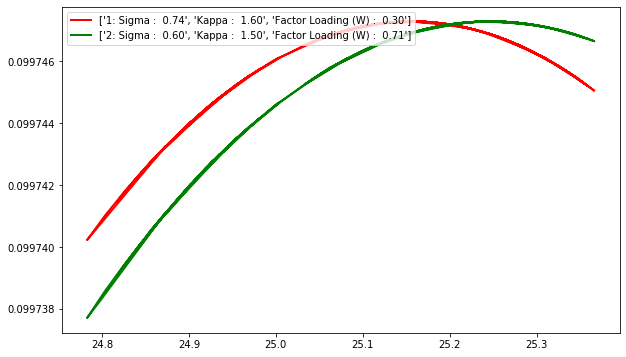

In [16]:
#Control Indexes
asset_id= 9


Model_X1 = np.log(pd.DataFrame(df_cap.loc[start_date:end_date, stock_id[asset_id]]))


#Parameters Experiment 1
Cov_X  = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
Cov_X_esc=Cov_X 
Corr_X = (df_cap[stock_id[asset_id]].corr(df_cap['DJI']))
sig_1 = np.array(Model_X1.std())
kappa_exp1 = 0.2*8
W1_exp1=0.30*1
W2_exp1=0.708*1
sig_1_esc=sig_1.item()*5
Labels = ['1: Sigma : ' + '{:5.2f}'.format(sig_1_esc),'Kappa : ' + '{:5.2f}'.format(kappa_exp1),
          'Factor Loading (W) : ' + '{:5.2f}'.format(W1_exp1)]

params=[kappa_exp1,W1_exp1,W2_exp1,sig_1_esc,Cov_X]

#,'1: $\kappa$ : ' + '{:5.4f}'.format(kappa_exp1) params=[kappa_exp1,W1_exp1,W2_exp1,sig_1_esc,Steps,Cov_X]

Name_Asset=stock_id[asset_id]


cutoff = 450

Model_Y1 = trunc_norm_pdf(params,cutoff,asset_id)
Model_Y1_Mean = Model_Y1.mean()
Model_Y1_Mean_1_esc=Model_Y1_Mean.item()




fig3 = plt.figure(figsize=(10,6))
ax7 = fig3.add_subplot(1,1,1)
ax7.plot(Model_X1, trunc_norm_pdf(params,450,asset_id),
        linewidth=2, color='r', label =  Labels )
ax7.legend(loc='upper left')

#Parameters Experiment 2
sig_2 = np.array(Model_X1.std())
kappa_exp2 = 0.2*7.5
W1_exp2=0.30*1.
W2_exp2=0.708*1.002
sig_2_esc=sig_2.item()*4
Labels2 = ['2: Sigma : ' + '{:5.2f}'.format(sig_2_esc),'Kappa : ' + '{:5.2f}'.format(kappa_exp2),
          'Factor Loading (W) : ' + '{:5.2f}'.format(W2_exp2)]

params2=[kappa_exp2,W1_exp2,W2_exp2,sig_2_esc,Cov_X]


ax7.plot(Model_X1, trunc_norm_pdf(params2,cutoff,asset_id),
       linewidth=2, color='g', label=Labels2)
ax7.legend(loc='upper left')

print(Name_Asset)
print('Experiment 1: Sigma_ 1 is: ' + '{:5.2f}'.format(sig_1_esc) )
print('Experiment 1: Cov_ 1 is: ' + '{:5.2f}'.format(Cov_X_esc) )
print('Experiment 1: Value_PDF_ 1 is: ' + '{:5.8f}'.format(Model_Y1_Mean_1_esc) )
print('Experiment 1: Corr X_DJI is: ' + '{:5.2f}'.format(Corr_X) )



plt.show()

**log likelihood function for the normal distribution**

Here the log likelihood function for the Xt data is computed given the normal distribution of the parameters of Wz and sigma

In [17]:
#Data exponential




def log_lik_norm(parameter_log,cutoff,asset_id):
    
    Model_X1 = np.log(pd.DataFrame(df_cap.loc[start_date:end_date, stock_id[asset_id]]))
    
    Cov_X  = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
    Cov_X_esc=Cov_X 
    Corr_X = (df_cap[stock_id[asset_id]].corr(df_cap['DJI']))
    sig_1 = np.array(Model_X1.std())
   
    kappa_est =parameter_log [0]
    W1_est=parameter_log[1]
    W2_est=parameter_log[2]
    sig_est = parameter_log[3]
    Cov_X_est = Cov_X
    
    
    params_init=[kappa_est,W1_est,W2_est,sig_est]

    pdf_vals = trunc_norm_pdf(params_init,cutoff,asset_id)
    ln_pdf_vals = (pdf_vals)   #np.log i have deleted beacause of the log normal in estimated values above..log_lik_val
    log_lik_val = ln_pdf_vals.sum()
    #log_lik_val
    return log_lik_val







In [18]:



def criteria(param_crit, *args):
    
    '''
        This function computes the negative of the LLm function given parameters and data.
        INPUT 
        params =  ([kappa, sigma,w1, w2,Cov])
        args = Z1, Z2, xvlas, cutoff
        
    '''
    
    kappa_exp1,W1_exp1,W2_exp1,sig_1_esc = param_crit
    X_T, cutoff, Z1_trunc , Z2_trunc,asset_id,Cov_X = args
    log_lik_val = log_lik_norm(param_crit,cutoff,asset_id)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val
    

def estimated_mean_value(params_est,asset_id):
    
    start_date = '2015-01-01'
    end_date = '2017-12-31'

    X_MLE = df_cap.loc[:,:]

    window_1_MLE = 12  
    window_2_MLE = 26

    Z1_MLE = X_MLE.rolling(window=window_1_MLE).mean()
    Z2_MLE = X_MLE.rolling(window=window_2_MLE).mean()

    X_T  = np.log(pd.DataFrame(X_MLE.loc[start_date:end_date, stock_id[asset_id]]))

    # Market SMA (12-26 Days) Signals 
    Z1_trunc = np.log(pd.DataFrame(Z1_MLE.loc[start_date:end_date, stock_id[asset_id]]))
    Z2_trunc  = np.log(pd.DataFrame(Z2_MLE.loc[start_date:end_date, stock_id[asset_id]]))
    
    Name_Asset=stock_id[asset_id]
    kappa_est =params_est [0]
    W1_est=params_est[1]
    W2_est=params_est[2]
    sig_est = params_est[3]
    Cov_X_est = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
    Return_log_d =  X_T.pct_change()
    
    #Calculate the factor loading and parameters
    
    Wz = (W1_est* Z1_trunc + W2_est* Z2_trunc)
    
    #Calculate of value cap market portfolio
   
    
    V_t  = Return_log_d - kappa_est * (Wz.mean() - 0.5 * sig_est**2/(kappa_est)- X_T )
    
    prob_notcut = sts.norm.cdf(cutoff, loc=V_t.mean(), scale=sig_est)
    
    
    pdf_val    = ((1/(sig_est* np.sqrt(2 * Cov_X)) *
                      np.exp( - (V_t  )**2 / (2 * Cov_X**2))) /
                        prob_notcut)
    
    Output = (Wz, V_t  ,Name_Asset)
    
    return Output

**Constrained minimization using the minimize() function**


The minimize function () can be used to find the values of the parameters that minimize some criterion function and for this scenario I have used the 'L-BFGS-B'.

Kappa_MLE= 0.1981727089382095  sig_MLE= 0.00019874536052309628  W1 = 0.31064130508956395  W2 = 0.6896380504500872
JPM   -75.433986
dtype: float64


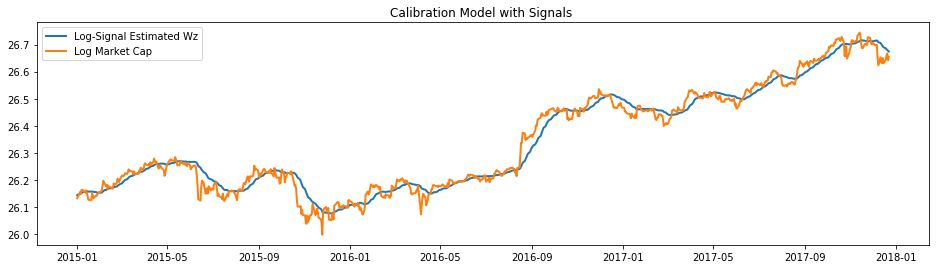

In [19]:
start_date = '2015-01-01'
end_date = '2017-12-31'  

asset_id = 14

X_MLE = df_cap.loc[:,:]



window_1_MLE = 14  
window_2_MLE = 26

Z1_MLE = X_MLE.rolling(window=window_1_MLE).mean()
Z2_MLE = X_MLE.rolling(window=window_2_MLE).mean()

X_RAP = np.log(pd.DataFrame(X_MLE.loc[start_date:end_date, stock_id[asset_id]]))
X_T = X_RAP[~X_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]
#X_T = X_RAP[~np.isnan(X_RAP).any(axis=1)]
    # Market SMA (12-26 Days) Signals 
Z1_RAP = np.log(pd.DataFrame(Z1_MLE.loc[start_date:end_date, stock_id[asset_id]]))
Z1_trunc  = Z1_RAP[~Z1_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]

Z2_RAP  = np.log(pd.DataFrame(Z2_MLE.loc[start_date:end_date, stock_id[asset_id]]))
Z2_trunc  = Z2_RAP[~Z2_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]


    # Parameters and argument os the Model
Model_X1 = np.log(pd.DataFrame(df_cap.loc[start_date:end_date, stock_id[asset_id]]))
Cov_X  = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
sig_1 = np.array(Model_X1.std())
kappa_init = 0.2
W1_init=0.0002
W2_init=0.0002
sig_init = 0.0002
Cov_X_init = Cov_X
cutoff = 4500

params_init = [kappa_init, W1_init,W2_init,sig_init]
mle_args = (X_T, cutoff, Z1_trunc , Z2_trunc,asset_id ,Cov_X_init)




lb = np.array([.700000, 0.301002, 0.68, .05])
ub = np.array([1.21032312, 0.45, 0.70005, 0.82])
bounds = [(None, ub[0]), (lb[1], ub[1]), (lb[2], None), (None, ub[3])]


results_cstr = opt.minimize(criteria, params_init, args=(mle_args), method="L-BFGS-B",
                       bounds=bounds , options={'gtol': 1e-10, 'disp': True},tol = 1e-9)

kappa_MLE, W1_MLE,W2_MLE,sig_MLE = results_cstr.x
print('Kappa_MLE=', kappa_MLE, ' sig_MLE=', sig_MLE , ' W1 =', W1_MLE, ' W2 =', W2_MLE )

#X_cap = np.log(pd.DataFrame(df_cap.loc[start_date:end_date, 'AAPL']))
#Return_log_d = X_cap.pct_change() lb[0]

Out1, Out2, Name = estimated_mean_value(results_cstr.x,asset_id)

RR=criteria

fig5 = plt.figure(figsize=(16,9))
ax10 = fig5.add_subplot(2,1,1)
ax10.plot(Out1,
     linewidth=2, label =  'Log-Signal Estimated Wz')

ax10.plot(X_T ,
       linewidth=2, label =  'Log Market Cap')
ax10.legend(loc='upper left')
ax10.legend(loc='best')
ax10.set_title('Calibration Model with Signals ')

LL_Estimated=criteria(params_init, X_T, cutoff, Z1_trunc , Z2_trunc,asset_id,Cov_X)

#fig6 = plt.figure(figsize=(10,6))
#ax10 = fig6.add_subplot(2,1,1)
#ax10.plot(Out2,
     #linewidth=2, label =  'Log-Estimated Portfolio Vt')


#print(Name)
print(LL_Estimated) 

## End of Part 1: Model calibration with moving average signals**


**Main Remarks Part 1**


- Understanding that the SMA is a trend follower or lagging indicator, since it is based on past prices. The most common applications are to identify the price trend or look for resistance patterns. In our simulations we have used it to identify trends in asset prices and we have mapped out a buy or sell strategy based on past price trends. We can clearly see that the average used by the SMA focuses on the moving average value (m + 1) / 2, that is, this is the amount of time for which the forecasts will tend to fall behind the inflection points . As we have been able to verify the value of m we have varied it from 16 to 22 obtaining a better result in terms of relative % return. Therefore we can conclude that by varying the parameter m we can somehow adjust or correct the prediction errors.

- As we know the objective of IRL is to learn from data policies through a reward function than in our experiment through a maximum likelihood estimate. It is observed that the parameters ($ \kappa_x  $ ,$  \sigma $ ,Wz) are not stable, which denotes that the SMA are not good predictors of future prices. In particular, we can observe negative values in the results of the table below, which suggests a local divergence of a predicted value instead of convergence of that value.

In [19]:
stock_id_1=df_cap.iloc[0,:].index

Table = pd.DataFrame(columns=['kappa_MLE', 'W1_MLE','W2_MLE','sig_MLE'],index=stock_id_1)

for asset_id_1 in range(0,30):
    
    
        
    Cov_X_init_2  = np.log(df_cap[stock_id[asset_id_1]].cov(df_cap['DJI']))
    
    X_RAP = np.log(pd.DataFrame(X_MLE.loc[start_date:end_date, stock_id[asset_id_1]]))
    X_T = X_RAP[~X_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]
    cutoff = 4500
    
    Z1_RAP = np.log(pd.DataFrame(Z1_MLE.loc[start_date:end_date, stock_id[asset_id_1]]))
    Z1_trunc  = Z1_RAP[~Z1_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]

    Z2_RAP  = np.log(pd.DataFrame(Z2_MLE.loc[start_date:end_date, stock_id[asset_id_1]]))
    Z2_trunc  = Z2_RAP[~Z2_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]
    
    
    
    
    lb = np.array([.700000, 0.301002, 0.68, .05])
    ub = np.array([1.21032312, 0.45, 0.70005, 0.82])
    bounds = [(None, ub[0]), (lb[1], ub[1]), (lb[2], None), (None, ub[3])]

    
    res = opt.minimize(criteria, params_init, args=(X_T, cutoff, Z1_trunc , Z2_trunc,asset_id_1 ,Cov_X_init_2), method='L-BFGS-B', options={'gtol': 1e-10, 'disp': True},bounds=bounds, tol = 1e-9)

# Append rows in Empty Dataframe by adding dictionaries
    Table.loc[stock_id_1[asset_id_1]]=[res.x[0],res.x[1],res.x[2],res.x[3]]
    Table_trunc  = Table[~Table.isin([np.nan, np.inf, -np.inf]).any(1)]
Table_trunc

C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


,kappa_MLE,W1_MLE,W2_MLE,sig_MLE
AAPL,0.198296,0.31054,0.689538,0.000199693
AXP,0.198415,0.31049,0.689488,0.0002
BA,-0.000648241,0.303669,0.682667,0.000202708
CAT,-0.0060525,0.304405,0.683007,0.000186491
CSCO,0.198393,0.310588,0.689583,0.000198751
CVX,0.198362,0.310526,0.689524,0.000200899
DIS,0.198575,0.310459,0.689457,0.000198737
DWDP,-0.00076183,0.302692,0.681532,0.000211348
GE,0.000190857,0.303743,0.682608,0.000779294
GS,0.198318,0.310545,0.689543,0.000198752


## Part 2: Propose and analyse your own signals  (Max 10 points)

In this part, you will experiment with other signals. Propose a signal and explain why it is interesting to 
include this signal in the portfolio analysis. Then add your favorite signal or signals to the previous benchmarck signals (or alternatively you can replace them), and repeat the analysis of model calibration. State your conclusions.

**Assumptions**

- 
For this simulation I have used a bollinguer band which is an indicator that can give me a range within which the price fluctuates. This bandwidth increases and decreases to reflect the volatility of the analyzed asset. I find this signal interesting in our experiment because within the signal it includes the standard deviation factor and can give us an indication of the perceived volatility.


Kappa_MLE= 0.19829631416189944  sig_MLE= 0.00019969297554508103  W1 = 0.31054043128843395  W2 = 0.689538431288434


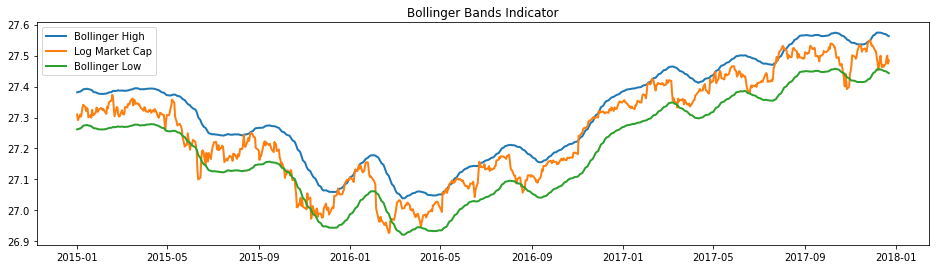

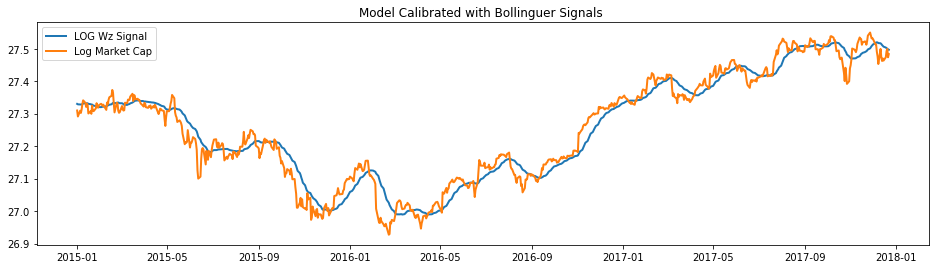

In [20]:
# Put the rest of your code and analysis for Part 2 here.

#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
start_date = '2015-01-01'
end_date = '2017-12-31'  
no_of_std = 2
asset_id = 0
window_2_BOLL = 26


X_BOLL_1 = df_cap.loc[:,:]
X_BOLL = X_BOLL_1[~X_BOLL_1.isin([np.nan, np.inf, -np.inf]).any(1)]

#Calculate rolling mean and standard deviation using number of days set above
Z1_BOLL = np.log(X_BOLL.rolling(window=window_2_BOLL).mean())
Z1_BOLL_S = np.log (X_BOLL.rolling(window=window_2_BOLL).std())

X_RAP = (pd.DataFrame(X_BOLL.loc[start_date:end_date, stock_id[asset_id]]))
X_T_BOLL = np.log(X_RAP[~X_RAP.isin([np.nan, np.inf, -np.inf]).any(1)])

Z1_RAP_BALL = (pd.DataFrame(Z1_BOLL.loc[start_date:end_date, stock_id[asset_id]]))
Z1_BALL_Mean  = Z1_RAP_BALL[~Z1_RAP_BALL.isin([np.nan, np.inf, -np.inf]).any(1)]

Z1_RAP_Std = (pd.DataFrame(Z1_BOLL_S.loc[start_date:end_date, stock_id[asset_id]]))
Z1_BALL_Std = Z1_RAP_Std [~Z1_RAP_Std .isin([np.nan, np.inf, -np.inf]).any(1)]

Rolling_Mean = Z1_BALL_Mean 
Bollinger_High = Z1_BALL_Mean + (Z1_BALL_Std/(200*no_of_std))
Bollinger_Low =  Z1_BALL_Mean - (Z1_BALL_Std/(200*no_of_std))


   # Parameters and argument os the Model

Cov_X_Boll  = np.log(df_cap[stock_id[asset_id]].cov(df_cap['DJI']))
sig_1_Boll = np.array(Model_X1.std())
kappa_init_Boll = 0.2
W1_init_Boll=0.0002
W2_init_Boll=0.0002
sig_init_Boll = 0.0002
Cov_X_init_Boll = Cov_X
cutoff = 4500

params_B = [kappa_init_Boll,W1_init_Boll,W2_init_Boll,sig_init_Boll]
mle_args_B = (X_T_BOLL, cutoff,Bollinger_High , Bollinger_Low ,asset_id ,Cov_X_Boll)




lb = np.array([.700000, 0.301002, 0.68, .05])
ub = np.array([1.21032312, 0.45, 0.70005, 0.82])
bounds_B = [(None, ub[0]), (lb[1], ub[1]), (lb[2], None), (None, ub[3])]


results_cstr = opt.minimize(criteria, params_B, args=(mle_args_B), method="L-BFGS-B",
                       bounds=bounds_B , options={'gtol': 1e-10, 'disp': True},tol = 1e-9)

kappa_MLE, W1_MLE,W2_MLE,sig_MLE = results_cstr.x
print('Kappa_MLE=', kappa_MLE, ' sig_MLE=', sig_MLE , ' W1 =', W1_MLE, ' W2 =', W2_MLE )

#X_cap = np.log(pd.DataFrame(df_cap.loc[start_date:end_date, 'AAPL']))
#Return_log_d = X_cap.pct_change() lb[0]

Out1, Out2, Name = estimated_mean_value(results_cstr.x,asset_id)

fig21 = plt.figure(figsize=(16,9))
ax21 = fig21.add_subplot(2,1,1)
ax21.plot(Bollinger_High ,
     linewidth=2, label =  'Bollinger High')

ax21.plot(X_T_BOLL ,
    linewidth=2, label =  'Log Market Cap')
ax21.set_title('Bollinger Bands Indicator')


ax21.plot(Bollinger_Low,
     linewidth=2, label =  'Bollinger Low')
ax21.set_title('Bollinger Bands Indicator')
ax21.legend(loc='best')
ax21.legend(loc='upper left')



fig20 = plt.figure(figsize=(16,9))
ax20 = fig20.add_subplot(2,1,1)
ax20.plot(Out1,
     linewidth=2, label =  'LOG Wz Signal')

ax20.plot(X_T_BOLL ,
    linewidth=2, label =  'Log Market Cap')
ax20.set_title('Model Calibrated with Bollinguer Signals ')

ax20.legend(loc='best')
ax20.legend(loc='upper left')

## End of Part 2: Model calibration with Bollinguer Bands**

**Main Remarks Part 2**

- As it was expectedthe parameters ($ \kappa_x  $ ,$  \sigma $ ,Wz) are not stable, because of moving average are not good predictors of future prices. In particular, we can observe negative values in the results of the table below, which suggests a local divergence of a predicted value instead of convergence of that value.

In [97]:
stock_id_3=df_cap.iloc[0,:].index

Table_3 = pd.DataFrame(columns=['kappa_Boll', 'W1_Boll','W2_Boll','sig_Boll'],index=stock_id_3)

for asset_id_3 in range(0,30):
    Cov_X_init_3  = np.log(df_cap[stock_id[asset_id_3]].cov(df_cap['DJI']))
    #Calculate rolling mean and standard deviation using number of days set above
    Z1_BOLL = np.log(X_BOLL.rolling(window=window_2_BOLL).mean())
    Z1_BOLL_S = np.log (X_BOLL.rolling(window=window_2_BOLL).std())

    X_RAP = (pd.DataFrame(X_BOLL.loc[start_date:end_date, stock_id_3[asset_id_3]]))
    X_T_BOLL = np.log(X_RAP[~X_RAP.isin([np.nan, np.inf, -np.inf]).any(1)])

    Z1_RAP_BALL = (pd.DataFrame(Z1_BOLL.loc[start_date:end_date, stock_id_3[asset_id_3]]))
    Z1_BALL_Mean  = Z1_RAP_BALL[~Z1_RAP_BALL.isin([np.nan, np.inf, -np.inf]).any(1)]

    Z1_RAP_Std = (pd.DataFrame(Z1_BOLL_S.loc[start_date:end_date, stock_id_3[asset_id_3]]))
    Z1_BALL_Std = Z1_RAP_Std [~Z1_RAP_Std .isin([np.nan, np.inf, -np.inf]).any(1)]

    Rolling_Mean = Z1_BALL_Mean 
    Bollinger_High = Z1_BALL_Mean + (Z1_BALL_Std/(200*no_of_std))
    Bollinger_Low =  Z1_BALL_Mean - (Z1_BALL_Std/(200*no_of_std))



    
    
    lb = np.array([.700000, 0.301002, 0.68, .05])
    ub = np.array([1.21032312, 0.45, 0.70005, 0.82])
    bounds = [(None, ub[0]), (lb[1], ub[1]), (lb[2], None), (None, ub[3])]

    
    res2 = opt.minimize(criteria, params_B, args=(X_T_BOLL, cutoff, Bollinger_High , Bollinger_Low,asset_id_3 ,Cov_X_init_3 ), method='L-BFGS-B', options={'gtol': 1e-10, 'disp': True},bounds=bounds, tol = 1e-9)

# Append rows in Empty Dataframe by adding dictionaries
    Table_3.loc[stock_id_3[asset_id_3]]=[res2.x[0],res2.x[1],res2.x[2],res2.x[3]]
Table_3

C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\REFSC\.conda\envs\r-tensorflow\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


,kappa_Boll,W1_Boll,W2_Boll,sig_Boll
AAPL,0.198296,0.31054,0.689538,0.000199693
AXP,0.198415,0.31049,0.689488,0.0002
BA,-0.000648241,0.303669,0.682667,0.000202708
CAT,-0.0060525,0.304405,0.683007,0.000186491
CSCO,0.198393,0.310588,0.689583,0.000198751
CVX,0.198362,0.310526,0.689524,0.000200899
DIS,0.198575,0.310459,0.689457,0.000198737
DWDP,-0.00076183,0.302692,0.681532,0.000211348
GE,0.000190857,0.303743,0.682608,0.000779294
GS,0.198318,0.310545,0.689543,0.000198752


## Part 3: Can you do it for the S&P500 market portfolio? (Max 10 point)

I repeat the analysis for the S&P500 portfolio. 



Kappa_MLE= 0.001230293555325179  sig_MLE= 0.2  W1 = 0.9736885362273341  W2 = 0.02666883407593997
SP500   -136.436779
dtype: float64


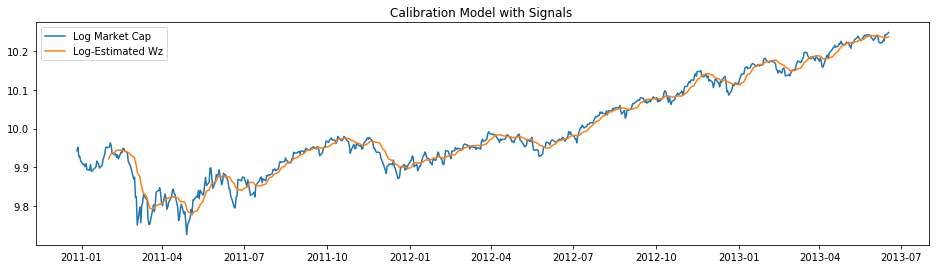

In [27]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates



### Calibration Model for S&P 500
start_date = '2010-12-27'
end_date = '2013-12-31' 

df_SP500= pd.read_csv(os.getcwd() + '/data/spx_holdings_and_spx_closeprice.csv')
df_SP500 = df_SP500[~df_SP500.isin([np.nan, np.inf, -np.inf]).any(1)] #Data Cleaning - NaNs, inf .... and so on.


Dates = pd.bdate_range(start='2000-01-27', end=None, periods=df_SP500.shape[0], freq='B')
df_SP500['Dates_SP500'] = Dates


df_SP500['SP500'] = df_SP500.sum(axis=1)


df_SP500.set_index('Dates_SP500',inplace=True, drop=True) 

#df_SP500.eq(0).any().any() Testing for 0´s or NaNs, r=pd.DataFrame((df_SP500[['SP500']] < 0).any(axis=1))



SP500_id=df_SP500.iloc[0,:].index
X_SP500 = df_SP500.loc[:,:]





window_1_SP500 = 14  
window_2_SP500 = 26

Z1_SP500 = X_SP500.rolling(window=window_1_SP500 ).mean()
Z2_SP500 = X_SP500.rolling(window=window_2_SP500).mean()

X_RAP = np.log(pd.DataFrame(X_SP500.loc[start_date:end_date, 'SP500']))
X_T = X_RAP[~X_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]

    # Market SMA (12-26 Days) Signals 
Z1_RAP = np.log(pd.DataFrame(Z1_SP500.loc[start_date:end_date,'SP500']))
Z1_trunc  = Z1_RAP[~Z1_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]

Z2_RAP  = np.log(pd.DataFrame(Z1_SP500.loc[start_date:end_date, 'SP500']))
Z2_trunc  = Z2_RAP[~Z2_RAP.isin([np.nan, np.inf, -np.inf]).any(1)]


    # Parameters and argument os the Model
Model_X1 = np.log(pd.DataFrame(df_SP500.loc[start_date:end_date, 'SP500']))
Cov_X  = np.log(df_SP500['SP500'].cov(df_SP500['AAPL']))
sig_1 = np.array(Model_X1.std())
kappa_init = 0.2
W1_init=1.2471
W2_init=.3
sig_init = 0.2
Cov_X_init = Cov_X
cutoff = 4500

asset_id=420

params_init = [kappa_init, W1_init,W2_init,sig_init]
mle_args = (X_T, cutoff, Z1_trunc , Z2_trunc,asset_id ,Cov_X_init)




lb = np.array([.700000, 0.301002, 0.48, .05])
ub = np.array([1.21032312, 0.45, 0.570005, 0.82])
bounds = [(None, ub[0]), (lb[1], ub[1]), (lb[2], None), (None, ub[3])]


results_cstr = opt.minimize(criteria_SP500, params_init, args=(mle_args), method="L-BFGS-B",
                       bounds=None , options={'gtol': 1e-10, 'disp': True},tol = 1e-9)

kappa_MLE, W1_MLE,W2_MLE,sig_MLE = results_cstr.x
print('Kappa_MLE=', kappa_MLE, ' sig_MLE=', sig_MLE , ' W1 =', W1_MLE, ' W2 =', W2_MLE )     



Out1_SP500, Out2_SP500, Name_SP500 = trunc_norm_SP500(results_cstr.x,cutoff,420)



Print_SP_1 = plt.figure(figsize=(16, 9))

Print_SP = Print_SP_1.add_subplot(2,1,1)

Print_SP.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


#ax10.plot(Out1,
#     linewidth=2, label =  'Log-Signal Estimated Wz')

Print_SP.plot(X_T, label =  'Log Market Cap')
Print_SP.legend(loc='upper left')
Print_SP.legend(loc='best')
Print_SP.set_title('Calibration Model with Signals ')



LL_Estimated_SP500=criteria_SP500(params_init, X_T, cutoff, Z1_trunc , Z2_trunc,asset_id,Cov_X)

#fig6 = plt.figure(figsize=(10,6))
#ax10 = fig6.add_subplot(2,1,1)
Print_SP.plot(Out1_SP500, label =  'Log-Estimated Wz')
Print_SP.legend(loc='upper left')
Print_SP.legend(loc='best')

#print(Name_SP500)
print(LL_Estimated_SP500) 




In [26]:
def trunc_norm_SP500(SP500_vals,cutoff,asset_id):
    
    start_date = '2010-12-27'
    end_date = '2013-12-31' 
    #Parameter of the Model
    
    SP500_id=df_SP500.iloc[0,:].index
    X_SP500 = df_SP500.loc[:,:]
    
    X_RO = np.log(pd.DataFrame(X_SP500.loc[start_date:end_date, 'SP500']))
    X_MLE = X_RO[~X_RO.isin([np.nan, np.inf, -np.inf]).any(1)]
   
    window_1_MLE = 12  
    window_2_MLE = 26
    
    
    

    Z1_MLE = X_MLE.rolling(window=window_1_MLE).mean()
    Z2_MLE = X_MLE.rolling(window=window_2_MLE).mean()

    X_T  = (pd.DataFrame(X_MLE.loc[start_date:end_date, SP500_id[asset_id]]))

    # Market SMA (12-26 Days) Signals 
    Z1_trunc = (pd.DataFrame(Z1_MLE.loc[start_date:end_date, SP500_id[asset_id]]))
    Z2_trunc  =(pd.DataFrame(Z2_MLE.loc[start_date:end_date, SP500_id[asset_id]]))
    
    X_t_mean = np.array(X_T.mean())
    
    Name_Asset=SP500_id[asset_id]
    Return_log = (X_T.pct_change())
    #Return_log = Return [~Return.isin([np.nan, np.inf, -np.inf]).any(1)]
    kappa = SP500_vals[0]
    w1 = SP500_vals[1]
    w2 = SP500_vals[2]
    Model_val = []
    sigma = SP500_vals[3]
    X_t = (X_T)
    Delta_t = [] #total_days_in_simulation
    Cov_X = np.log(df_SP500[SP500_id[asset_id]].cov(df_SP500['AAPL']))
    Z_1 = (Z1_trunc)
    Z_2 = (Z2_trunc)
    
    #Main_data = {Return_log, Z_1, Z_2} 
    
    
    
    
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        
        
    
        Wz = (w1 * Z_1 + w2 * Z_2)
        
  
        
        V_t  = Return_log - kappa * (Wz.mean()-  0.5 * sigma**2/(kappa) - X_t)

        
            
    #pdf_val    = #((1/np.sqrt(2 * np.pi*Cov_X)) *
                    #np.exp( - (prob_notcut*(V_t)**2  ) / (2 * Cov_X)))
        
        prob_notcut = sts.norm.cdf(cutoff, loc=V_t.mean(), scale=sigma)
        SP500_val    = ((1/(np.sqrt(2 * Cov_X)) *
                      np.exp( - (V_t)**2 / (2 * Cov_X**2))) /
                        prob_notcut)
   


    return   (Wz , SP500_val  ,Name_Asset)


In [24]:
def log_lik_norm_SP500(parameter_SP500,cutoff,asset_id):
    
    start_date = '2010-12-27'
    end_date = '2013-12-31' 
    Model_X1 =  np.log(pd.DataFrame(df_SP500.loc[start_date:end_date, 'SP500']))
    
    Cov_X  = np.log(df_SP500[SP500_id[asset_id]].cov(df_SP500['AAPL']))
    Cov_X_esc=Cov_X 
    Corr_X = (df_SP500[SP500_id[asset_id]].corr(df_SP500['AAPL']))
    sig_1 = np.array(Model_X1.std())
   
    kappa_est =parameter_SP500 [0]
    W1_est=parameter_SP500[1]
    W2_est=parameter_SP500[2]
    sig_est = parameter_SP500[3]
    Cov_X_est = Cov_X
    
    
    params_init=[kappa_est,W1_est,W2_est,sig_1]

    Wz , SP500_val  ,Name_Asset = trunc_norm_SP500(params_init,cutoff,asset_id)
    ln_pdf_vals = (SP500_val)   #np.log i have deleted beacause of the log normal in estimated values above..log_lik_val
    log_lik_val = ln_pdf_vals.sum()
    #log_lik_val
    return log_lik_val

    

In [25]:
def criteria_SP500(param_crit_SP500, *args):
    
    '''
        This function computes the negative of the LLm function given parameters and data.
        INPUT 
        params =  ([kappa, sigma,w1, w2,Cov])
        args = Z1, Z2, xvlas, cutoff
        
    '''
    
    kappa_exp1,W1_exp1,W2_exp1,sig_1_esc = param_crit_SP500
    X_T, cutoff, Z1_trunc , Z2_trunc,asset_id,Cov_X = args
    log_lik_val = log_lik_norm_SP500(param_crit_SP500,cutoff,asset_id)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val
    